In [17]:
# Dependencies
from bs4 import BeautifulSoup as bs
import requests
import pymongo
from splinter import Browser
from flask import Flask, render_template, redirect
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np

In [19]:
# The default port used by MongoDB is 27017
#https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define the 'classDB' database in Mongo
db = client.disastersmx

In [20]:
# Make a reference to the books.csv file path
granizo_path = "Resources/atlas-de-riesgo-granizo.csv"
inunda_path = "Resources/atlas-de-riesgo-inundaciones.csv"
precip_path = "Resources/atlas-de-riesgo-precipitacion.csv"
# Import the books.csv file as a DataFrame
gran_csv = pd.read_csv(granizo_path)
inun_csv = pd.read_csv(inunda_path)
prec_csv = pd.read_csv(precip_path)
prec_csv .head()

,id,geo_point_2d,geo_shape,fenomeno,taxonomia,r_p_v_e,intensidad,descripcio,fuente,cvegeo,alcaldia,entidad,area_m2,perime_m,period_ret,intens_uni,intens_num,int2
0,817.0,"19.3628767409,-99.2270030874","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Medio,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0901000012254,Álvaro Obregón,Ciudad de México,251046.580885,3065.230119,5 años,mm,60 a 64,3
1,825.0,"19.359713645,-99.1126636533","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700010958,Iztapalapa,Ciudad de México,263600.343771,2128.493232,5 años,mm,54 a 60,2
2,838.0,"19.3499612368,-99.0618445374","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700011443,Iztapalapa,Ciudad de México,153030.578543,2165.541417,5 años,mm,54 a 60,2
3,844.0,"19.3743243684,-99.0503042071","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700014556,Iztapalapa,Ciudad de México,26861.442595,774.887642,5 años,mm,54 a 60,2
4,851.0,"19.3232006479,-99.045198103","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Hidrometeorológicos,Precipitación,Peligro,Muy Bajo,Total acumulado de partículas liquidas o solid...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900700015728,Iztapalapa,Ciudad de México,67828.062894,1189.839611,5 años,mm,41 a 54,1


In [ ]:
#Difine count coloumn
count_prec =prec_csv["intensidad"].value_counts()
count_prec


In [22]:
# Here, db.students refers to the collection 'disastermx '
disastersmx = db.prec_csv.find()



In [26]:
cleandata=prec_csv.to_dict("records")
cleandata

[{'id': 817.0,
  'geo_point_2d': '19.3628767409,-99.2270030874',
  'geo_shape': '{"type": "MultiPolygon", "coordinates": [[[[-99.22523326660581, 19.364950194884198], [-99.22483491184282, 19.365049511631106], [-99.22461660079759, 19.36450169932384], [-99.22452189584993, 19.364252104488553], [-99.22442997531118, 19.36415055525862], [-99.22433184262098, 19.364102008021533], [-99.22417244362936, 19.364084864767793], [-99.22397305706035, 19.364111556059946], [-99.22372225708625, 19.36415613360945], [-99.22335536524437, 19.364267361895205], [-99.22300470839468, 19.36446749063845], [-99.22273930580906, 19.36463257350818], [-99.22264554005355, 19.36466021893322], [-99.22239272786999, 19.364673920043035], [-99.22062970872447, 19.364662833467293], [-99.2224994492218, 19.364009183932954], [-99.22301871231448, 19.363827648437514], [-99.22334292215972, 19.363645867783013], [-99.22376889787392, 19.363166844678467], [-99.22396074236941, 19.36270270704104], [-99.2240341366802, 19.362442715896858], [-9

In [27]:
# Insert a document into the 'students' collection
db.cleandata.insert_many(cleandata)


In [6]:
#Describe table
prec_csv.describe()


,id,area_m2,perime_m,int2
count,4908.000000,4.908000e+03,4908.000000,4908.000000
mean,1227.500000,6.085715e+05,2918.118986,2.378158
std,708.480901,4.666699e+06,3868.162639,0.918765
min,1.000000,5.990912e+03,316.065331,1.000000
25%,614.000000,1.487948e+05,1793.721660,2.000000
50%,1227.500000,2.332595e+05,2334.944716,2.000000
75%,1841.000000,3.613289e+05,3035.929999,3.000000
max,2454.000000,1.638644e+08,114195.715371,5.000000


<AxesSubplot:xlabel='alcaldia'>

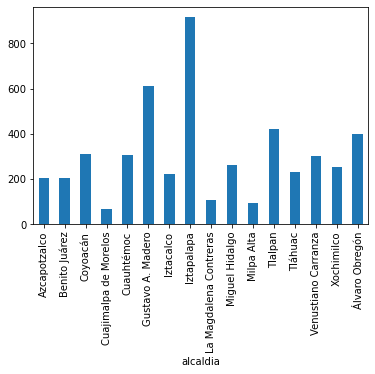

In [7]:
#Graph alcaldia variable with id
graph_id=prec_csv.groupby('alcaldia')["id"].count()
graph_id.plot.bar()

In [8]:
#Data frame of 
graph=prec_csv.groupby(['alcaldia','intensidad'])["id"].count()
graph

alcaldia                intensidad
Azcapotzalco            Alto           82
                        Bajo           12
                        Medio         112
Benito Juárez           Alto           18
                        Bajo          102
                        Medio          84
Coyoacán                Bajo          208
                        Medio         104
Cuajimalpa de Morelos   Alto           30
                        Medio          36
Cuauhtémoc              Alto           32
                        Bajo          180
                        Medio          94
Gustavo A. Madero       Alto           62
                        Bajo          256
                        Medio         126
                        Muy Bajo      168
Iztacalco               Bajo          216
                        Muy Bajo        4
Iztapalapa              Bajo          538
                        Muy Bajo      378
La Magdalena Contreras  Alto            2
                        Medio         104

In [9]:
#Percentil 95%
#percntil=prec_csv['perime_m'].quantile(0.95)
#percntil

5884.629585413498

In [10]:
#Percentil 5%
#percntil=prec_csv['perime_m'].quantile(0.05)
#percntil

1079.9248113069998

In [11]:
#Clean data removing outliers
#clean_pre=prec_csv.loc[(prec_csv['perime_m']>= 1079.9248113069998) & (prec_csv['perime_m']<= 5884.629585413498),:].sort_values('perime_m', ascending= False)
#clean_pre.count()

id              4416
geo_point_2d    4416
geo_shape       4416
fenomeno        4416
taxonomia       4416
r_p_v_e         4416
intensidad      4416
descripcio      4416
fuente          4416
cvegeo          4416
alcaldia        4416
entidad         4416
area_m2         4416
perime_m        4416
period_ret      4416
intens_uni      4416
intens_num      4416
int2            4416
dtype: int64

In [12]:
# Export file as a CSV, without the Pandas index, but with the header
prec_csv.to_csv("../Disasters-mxcity/clean_precipitacion.csv", index=False, header=True)


In [13]:
#Convert to html
graph_id.to_json()

'{"Azcapotzalco":206,"Benito Ju\\u00e1rez":204,"Coyoac\\u00e1n":312,"Cuajimalpa de Morelos":66,"Cuauht\\u00e9moc":306,"Gustavo A. Madero":612,"Iztacalco":220,"Iztapalapa":916,"La Magdalena Contreras":106,"Miguel Hidalgo":262,"Milpa Alta":92,"Tlalpan":422,"Tl\\u00e1huac":230,"Venustiano Carranza":302,"Xochimilco":252,"\\u00c1lvaro Obreg\\u00f3n":400}'